In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def draw_object(vertices, title="2D Object"):
    closed_vertices = np.vstack((vertices, vertices[0]))
    plt.figure()
    plt.plot(closed_vertices[:, 0], closed_vertices[:, 1], marker='o')
    plt.title(title)
    plt.grid()
    plt.axis("equal")
    plt.show()

In [ ]:
def translate(vertices, tx, ty):
    T = np.array([[1, 0, tx], [0, 1, ty], [0, 0, 1]])
    vertices = np.hstack((vertices, np.ones((len(vertices), 1))))
    result = vertices @ T.T
    return result[:, :2]

In [ ]:
def scale(vertices, sx, sy):
    S = np.array([[sx, 0, 0], [0, sy, 0], [0, 0, 1]])
    vertices = np.hstack((vertices, np.ones((len(vertices), 1))))
    result = vertices @ S.T
    return result[:, :2]

In [ ]:
def rotate(vertices, angle):
    rad = np.radians(angle)
    R = np.array([[np.cos(rad), -np.sin(rad), 0],
                  [np.sin(rad), np.cos(rad), 0],
                  [0, 0, 1]])
    vertices = np.hstack((vertices, np.ones((len(vertices), 1))))
    result = vertices @ R.T
    return result[:, :2]

In [ ]:
def reflect(vertices, axis):
    if axis == 'x':
        R = np.array([[1, 0, 0], [0, -1, 0], [0, 0, 1]])
    elif axis == 'y':
        R = np.array([[-1, 0, 0], [0, 1, 0], [0, 0, 1]])
    vertices = np.hstack((vertices, np.ones((len(vertices), 1))))
    result = vertices @ R.T
    return result[:, :2]

In [ ]:
def shear(vertices, shx, shy):
    Sh = np.array([[1, shx, 0], [shy, 1, 0], [0, 0, 1]])
    vertices = np.hstack((vertices, np.ones((len(vertices), 1))))
    result = vertices @ Sh.T
    return result[:, :2]

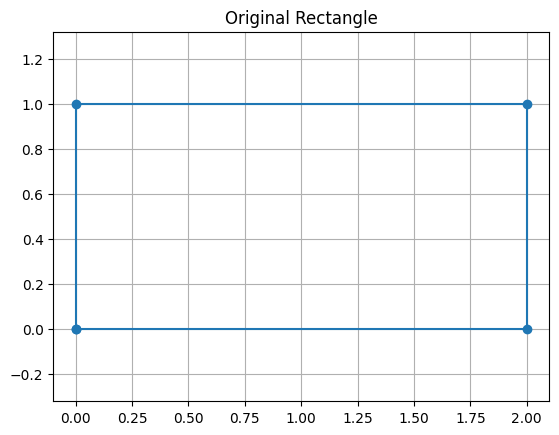

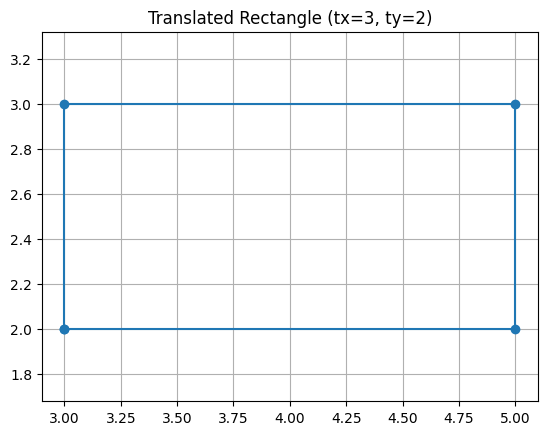

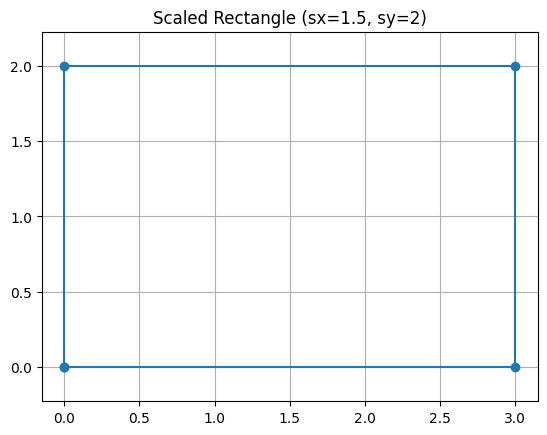

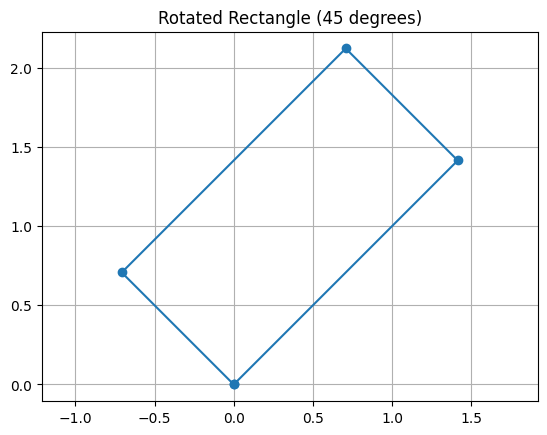

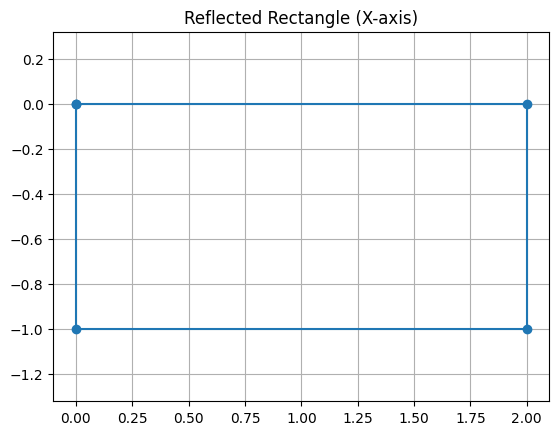

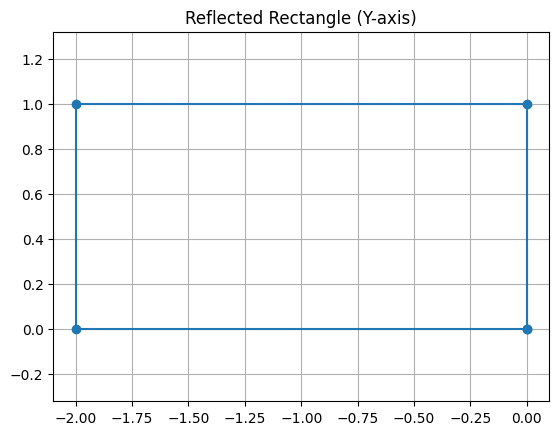

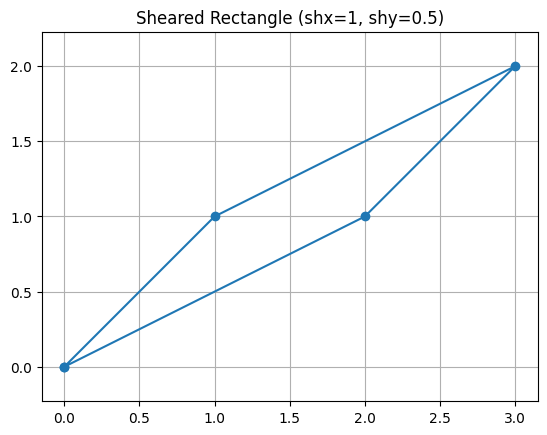

In [ ]:
rectangle = np.array([[0, 0], [2, 0], [2, 1], [0, 1]])
draw_object(rectangle, "Original Rectangle")
draw_object(translate(rectangle, 3, 2), "Translated Rectangle (tx=3, ty=2)")
draw_object(scale(rectangle, 1.5, 2), "Scaled Rectangle (sx=1.5, sy=2)")
draw_object(rotate(rectangle, 45), "Rotated Rectangle (45 degrees)")
draw_object(reflect(rectangle, 'x'), "Reflected Rectangle (X-axis)")
draw_object(reflect(rectangle, 'y'), "Reflected Rectangle (Y-axis)")
draw_object(shear(rectangle, 1, 0.5), "Sheared Rectangle (shx=1, shy=0.5)")

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def show_image(img, title="Image"):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()
image = cv2.imread("Picture1.jpg")
rows, cols, _ = image.shape

In [ ]:
def translate(image, tx, ty):
    M = np.float32([[1, 0, tx], [0, 1, ty]])
    return cv2.warpAffine(image, M, (cols, rows))

In [ ]:
def scale(image, sx, sy):
    return cv2.resize(image, None, fx=sx, fy=sy, interpolation=cv2.INTER_LINEAR)


In [ ]:
def rotate(image, angle):
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    return cv2.warpAffine(image, M, (cols, rows))

In [ ]:
def reflect(image, axis):
    if axis == 'x':
        return cv2.flip(image, 0)
    elif axis == 'y':
        return cv2.flip(image, 1)

In [ ]:
def crop(image, x_start, y_start, width, height):
    return image[y_start:y_start+height, x_start:x_start+width]

In [ ]:
def shear(image, shx, shy):
    M = np.float32([[1, shx, 0], [shy, 1, 0]])
    return cv2.warpAffine(image, M, (cols, rows))

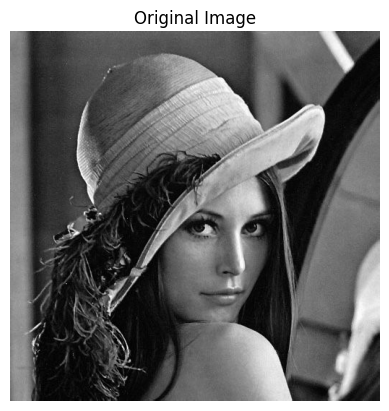

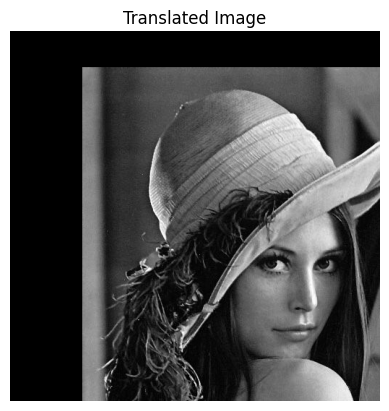

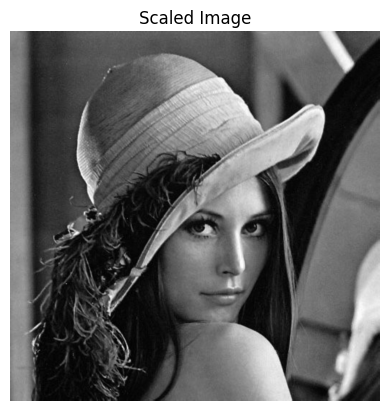

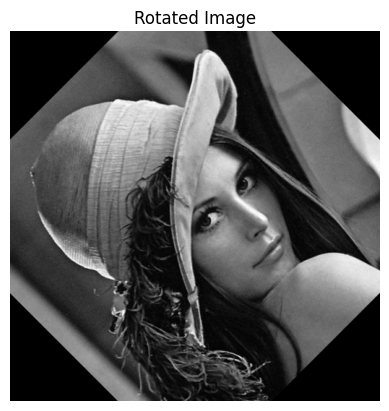

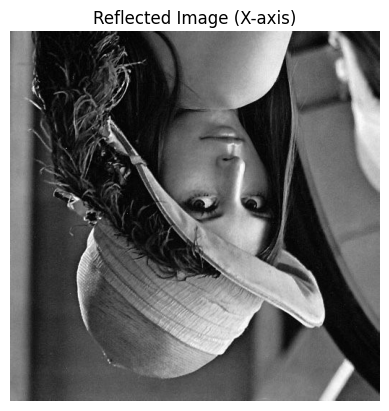

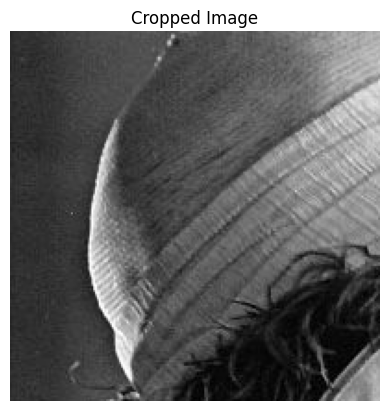

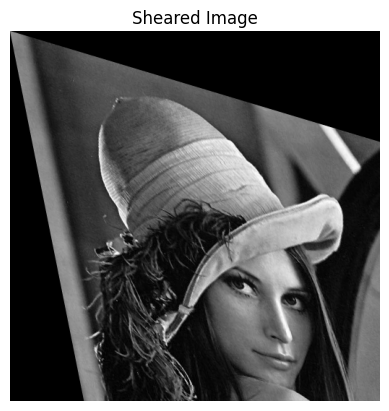

In [ ]:
show_image(image, "Original Image")
show_image(translate(image, 100, 50), "Translated Image")
show_image(scale(image, 1.5, 1.5), "Scaled Image")
show_image(rotate(image, 45), "Rotated Image")
show_image(reflect(image, 'x'), "Reflected Image (X-axis)")
show_image(crop(image, 50, 50, 200, 200), "Cropped Image")
show_image(shear(image, 0.2, 0.3), "Sheared Image")